In [47]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import linregress
import seaborn as sn
from collections import Counter 
from sklearn.linear_model import LinearRegression
import scipy.stats as st

import pylab

import statsmodels.api as sm


In [2]:
#These are the 5 sets of raw data that we have.

file = "csv_data/2015.csv"
file1 = "csv_data/2016.csv"
file2 = "csv_data/2017.csv"
file3 = "csv_data/2018.csv"
file4 = "csv_data/2019.csv"

In [3]:
# Dataframes by year.

df_2015 = pd.read_csv(file)
df_2016 = pd.read_csv(file1)
df_2017 = pd.read_csv(file2)
df_2018 = pd.read_csv(file3)
df_2019 = pd.read_csv(file4)

In [4]:
# Here we started the process of checking what our csvs looked like.
#We were interested in the # of rows and columns in each csv file. 

print("2015: ", df_2015.shape)
print("2016: ", df_2016.shape)
print("2017: ", df_2017.shape)
print("2018: ", df_2018.shape)
print("2019: ", df_2019.shape)

2015:  (158, 12)
2016:  (157, 13)
2017:  (155, 12)
2018:  (156, 9)
2019:  (156, 9)


In [5]:
# Next, we checked for any empty values in each individual year. Here we can see that 2015 did not have any empty values. 
df_2015.isna().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [6]:
# After looking at the components of each year, we noticed the column names varied, so we decided to rename and drop columns
# so that all the years matched. 
df_2015.rename(columns={'Happiness Rank':'rank', 'Happiness Score':'score', 'Economy (GDP per Capita)': 'gdp',
                      'Health (Life Expectancy)': 'health', 'Trust (Government Corruption)': 'corruption',
                      "Dystopia Residual": "dystopia"},
                        inplace = True)
df_2015.columns = df_2015.columns.str.lower()
df_2015.columns

Index(['country', 'region', 'rank', 'score', 'standard error', 'gdp', 'family',
       'health', 'freedom', 'corruption', 'generosity', 'dystopia'],
      dtype='object')

In [7]:
df_2015.drop(columns = ['region', 'standard error'], inplace = True)
df_2015.sample(5)

,country,rank,score,gdp,family,health,freedom,corruption,generosity,dystopia
79,Azerbaijan,80,5.212,1.02389,0.93793,0.64045,0.37030,0.16065,0.07799,2.00073
109,Iran,110,4.686,1.00880,0.54447,0.69805,0.30033,0.05863,0.38086,1.69440
85,Romania,86,5.124,1.04345,0.88588,0.76890,0.35068,0.00649,0.13748,1.93129
93,Mozambique,94,4.971,0.08308,1.02626,0.09131,0.34037,0.15603,0.22269,3.05137
122,Sierra Leone,123,4.507,0.33024,0.95571,0.00000,0.40840,0.08786,0.21488,2.51009


In [8]:
df_2016.isna().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Lower Confidence Interval        0
Upper Confidence Interval        0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [9]:
df_2016.columns = df_2016.columns.str.lower()
df_2016.rename(columns={'happiness rank':'rank', 'happiness score':'score', 'economy (gdp per capita)': 'gdp',
                      'health (life expectancy)':'health', 'trust (government corruption)': 'corruption',
                      "dystopia residual": "dystopia"},
                       inplace = True)
df_2016.columns

Index(['country', 'region', 'rank', 'score', 'lower confidence interval',
       'upper confidence interval', 'gdp', 'family', 'health', 'freedom',
       'corruption', 'generosity', 'dystopia'],
      dtype='object')

In [10]:
df_2016.drop(columns = ['lower confidence interval','upper confidence interval',
                      'region'],
           inplace = True)
df_2016.sample(5)

,country,rank,score,gdp,family,health,freedom,corruption,generosity,dystopia
23,Chile,24,6.705,1.21670,0.90587,0.81883,0.37789,0.11451,0.31595,2.95505
7,New Zealand,8,7.334,1.36066,1.17278,0.83096,0.58147,0.41904,0.49401,2.47553
61,North Cyprus,62,5.771,1.31141,0.81826,0.84142,0.43596,0.16578,0.26322,1.93447
118,Myanmar,119,4.395,0.34112,0.69981,0.39880,0.42692,0.20243,0.81971,1.50655
0,Denmark,1,7.526,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939


In [11]:
df_2017.isna().sum()

Country                          0
Happiness.Rank                   0
Happiness.Score                  0
Whisker.high                     0
Whisker.low                      0
Economy..GDP.per.Capita.         0
Family                           0
Health..Life.Expectancy.         0
Freedom                          0
Generosity                       0
Trust..Government.Corruption.    0
Dystopia.Residual                0
dtype: int64

In [12]:
# This particular year had column names with periods instead of spaces, so we got rid of the periods
# and substituted spaces. 

df_2017.columns = df_2017.columns.str.replace(".", "")

# let's convert into lower case
df_2017.columns = df_2017.columns.str.lower()
df_2017.rename(columns = {"happinessrank": "rank", "happinessscore": "score", "healthlifeexpectancy": "health",
                        "economygdppercapita": "gdp", "trustgovernmentcorruption": "corruption",
                        "dystopiaresidual": "dystopia"}, inplace = True)
df_2017.columns

Index(['country', 'rank', 'score', 'whiskerhigh', 'whiskerlow', 'gdp',
       'family', 'health', 'freedom', 'generosity', 'corruption', 'dystopia'],
      dtype='object')

In [13]:
df_2017.drop(columns = ['whiskerhigh', 'whiskerlow'], inplace = True)
df_2017.sample(5)

,country,rank,score,gdp,family,health,freedom,generosity,corruption,dystopia
1,Denmark,2,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
49,Belize,50,5.956,0.907975,1.081418,0.450192,0.547509,0.240016,0.096581,2.631956
38,Kuwait,39,6.105,1.632952,1.259699,0.632106,0.496338,0.228290,0.215160,1.640425
95,Tajikistan,96,5.041,0.524714,1.271463,0.529235,0.471567,0.248998,0.146377,1.849049
68,Turkey,69,5.500,1.198274,1.337753,0.637606,0.300741,0.046693,0.099672,1.879278


In [14]:
# Here we found out we have one empty value in the corruptions column. We will
# need locate and clean up that empty value.
df_2018.isna().sum()

Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       1
dtype: int64

In [15]:
df_2018.columns = df_2018.columns.str.lower()
df_2018.rename(columns = {"overall rank": "rank", "country or region": "country",
                         "freedom to make life choices": "freedom", "perceptions of corruption": "corruption",
                        "gdp per capita": "gdp", "healthy life expectancy": "health",
                        "social support": "family"}, inplace=True)
df_2018.columns = df_2018.columns.str.replace(" ", "_")
df_2018.columns

Index(['rank', 'country', 'score', 'gdp', 'family', 'health', 'freedom',
       'generosity', 'corruption'],
      dtype='object')

In [16]:
df_2019.columns = df_2019.columns.str.lower()
df_2019.rename(columns = {"overall rank": "rank", "country or region": "country",
                         "freedom to make life choices": "freedom", "perceptions of corruption": "corruption",
                        "gdp per capita": "gdp", "healthy life expectancy": "health",
                        "social support": "family"}, inplace=True)
df_2019.columns = df_2019.columns.str.replace(" ", "_")
df_2019.columns

Index(['rank', 'country', 'score', 'gdp', 'family', 'health', 'freedom',
       'generosity', 'corruption'],
      dtype='object')

In [17]:
df_2019.isna().sum()

rank          0
country       0
score         0
gdp           0
family        0
health        0
freedom       0
generosity    0
corruption    0
dtype: int64

In [18]:
# We printed out all the columns to compare them and make sure they are 
# named the same.

def print_all_dataframe_columns():
    print("2015:\n", df_2015.columns.to_list())
    print("\n2016:\n", df_2016.columns.to_list())
    print("\n2017:\n", df_2017.columns.to_list())
    print("\n2018:\n", df_2018.columns.to_list())
    print("\n2019:\n", df_2019.columns.to_list())
    
print_all_dataframe_columns()

2015:
 ['country', 'rank', 'score', 'gdp', 'family', 'health', 'freedom', 'corruption', 'generosity', 'dystopia']

2016:
 ['country', 'rank', 'score', 'gdp', 'family', 'health', 'freedom', 'corruption', 'generosity', 'dystopia']

2017:
 ['country', 'rank', 'score', 'gdp', 'family', 'health', 'freedom', 'generosity', 'corruption', 'dystopia']

2018:
 ['rank', 'country', 'score', 'gdp', 'family', 'health', 'freedom', 'generosity', 'corruption']

2019:
 ['rank', 'country', 'score', 'gdp', 'family', 'health', 'freedom', 'generosity', 'corruption']


In [19]:
# Our goal is to stack all of the csv files, but we still want to distinguish
# which year each row of info came from, so we are adding a column with each year.

df_2015['year'] = '2015'
df_2016['year'] = '2016'
df_2017['year'] = '2017'
df_2018['year'] = '2018'
df_2019['year'] = '2019'

df_2017.columns


Index(['country', 'rank', 'score', 'gdp', 'family', 'health', 'freedom',
       'generosity', 'corruption', 'dystopia', 'year'],
      dtype='object')

In [20]:
main_data = pd.concat([df_2015, df_2016, df_2017, df_2018, df_2019]).reset_index(drop=True)
main_data.shape
main_data.sample(5)

,country,rank,score,gdp,family,health,freedom,corruption,generosity,dystopia,year
573,Palestinian Territories,104,4.743,0.642000,1.217000,0.602000,0.266000,0.076000,0.086000,NaN,2018
718,China,93,5.191,1.029000,1.125000,0.893000,0.521000,0.100000,0.058000,NaN,2019
410,Tajikistan,96,5.041,0.524714,1.271463,0.529235,0.471567,0.146377,0.248998,1.849049,2017
691,Portugal,66,5.693,1.221000,1.431000,0.999000,0.508000,0.025000,0.047000,NaN,2019
216,Bolivia,59,5.822,0.794220,0.837790,0.469700,0.509610,0.077460,0.216980,2.916350,2016


In [21]:
# We noticed that for the years 2018 and 2019 the dystopia value is missing 


df_2018["dystopia"] = main_data["score"] - main_data["gdp"] - main_data["family"] - main_data["health"] - main_data["freedom"] - main_data["corruption"] - main_data["generosity"]

df_2019["dystopia"] = main_data["score"] - main_data["gdp"] - main_data["family"] - main_data["health"] - main_data["freedom"] - main_data["corruption"] - main_data["generosity"]



In [22]:
dim_main_data = pd.concat([df_2015, df_2016, df_2017]).reset_index(drop=True)
dim_main_data.sample(5)

,country,rank,score,gdp,family,health,freedom,corruption,generosity,dystopia,year
328,United States,14,6.993,1.546259,1.419921,0.774287,0.505741,0.135639,0.392579,2.218113,2017
307,Liberia,150,3.622,0.107060,0.503530,0.231650,0.257480,0.048520,0.240630,2.232840,2016
429,Senegal,115,4.535,0.479309,1.179692,0.409363,0.377922,0.115460,0.183469,1.789646,2017
346,Thailand,32,6.424,1.127869,1.425792,0.647239,0.580201,0.031613,0.572123,2.039508,2017
201,Venezuela,44,6.084,1.133670,1.033020,0.619040,0.198470,0.083040,0.042500,2.974680,2016


In [23]:
main_data.country = main_data.country.str.lower().str.replace(" ", "_")

main_data.isna().sum()

country         0
rank            0
score           0
gdp             0
family          0
health          0
freedom         0
corruption      1
generosity      0
dystopia      312
year            0
dtype: int64

In [24]:
main_data[main_data.isna().values]

,country,rank,score,gdp,family,health,freedom,corruption,generosity,dystopia,year
470,finland,1,7.632,1.305,1.592,0.874,0.681,0.393,0.202,NaN,2018
471,norway,2,7.594,1.456,1.582,0.861,0.686,0.340,0.286,NaN,2018
472,denmark,3,7.555,1.351,1.590,0.868,0.683,0.408,0.284,NaN,2018
473,iceland,4,7.495,1.343,1.644,0.914,0.677,0.138,0.353,NaN,2018
474,switzerland,5,7.487,1.420,1.549,0.927,0.660,0.357,0.256,NaN,2018
...,...,...,...,...,...,...,...,...,...,...,...
777,rwanda,152,3.334,0.359,0.711,0.614,0.555,0.411,0.217,NaN,2019
778,tanzania,153,3.231,0.476,0.885,0.499,0.417,0.147,0.276,NaN,2019
779,afghanistan,154,3.203,0.350,0.517,0.361,0.000,0.025,0.158,NaN,2019
780,central_african_republic,155,3.083,0.026,0.000,0.105,0.225,0.035,0.235,NaN,2019


In [25]:
main_data.loc[main_data.country == "united_arab_emirates"]

,country,rank,score,gdp,family,health,freedom,corruption,generosity,dystopia,year
19,united_arab_emirates,20,6.901,1.427270,1.12575,0.809250,0.641570,0.38583,0.264280,2.247430,2015
185,united_arab_emirates,28,6.573,1.573520,0.87114,0.729930,0.562150,0.35561,0.265910,2.215070,2016
335,united_arab_emirates,21,6.648,1.626343,1.26641,0.726798,0.608345,0.32449,0.360942,1.734704,2017
489,united_arab_emirates,20,6.774,2.096000,0.77600,0.670000,0.284000,NaN,0.186000,NaN,2018
646,united_arab_emirates,21,6.825,1.503000,1.31000,0.825000,0.598000,0.18200,0.262000,NaN,2019


In [26]:
avg_corruption = main_data.loc[main_data.country == "united_arab_emirates", "corruption"].mean()
main_data.corruption.fillna(avg_corruption, inplace=True)


In [27]:
main_data.isna().sum().any()

True

In [28]:
main_data.sample(5)

,country,rank,score,gdp,family,health,freedom,corruption,generosity,dystopia,year
616,malawi,147,3.587,0.186000,0.541000,0.306000,0.531000,0.080000,0.210000,NaN,2018
307,liberia,150,3.622,0.107060,0.503530,0.231650,0.257480,0.048520,0.240630,2.232840,2016
362,italy,48,5.964,1.395067,1.444923,0.853144,0.256451,0.028028,0.172790,1.813312,2017
711,kyrgyzstan,86,5.261,0.551000,1.438000,0.723000,0.508000,0.023000,0.300000,NaN,2019
351,saudi_arabia,37,6.344,1.530624,1.286678,0.590148,0.449751,0.273432,0.147616,2.065430,2017


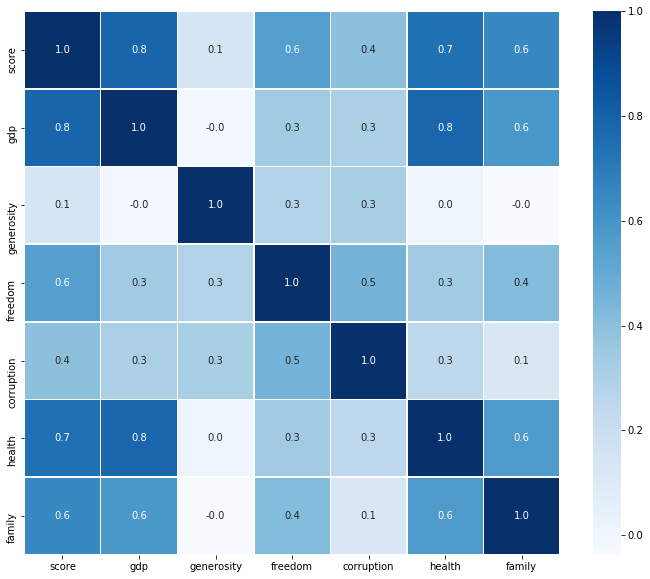

<Figure size 432x288 with 0 Axes>

In [29]:
#correlation map  2015-2019

categories = ["score", "gdp", "generosity", "freedom", "corruption", "health", "family"]
fig, ax = plt.subplots(figsize= (12, 10))
sn.heatmap(main_data[categories].corr(), annot=True, cmap="Blues", linewidths=.5, fmt=".1f", ax=ax)
plt.show()

plt.savefig('Graphs/heatmap_main_data.png')

#the happiness score has a strong linear relationship with GDP and Family (Social Support, and health (healthy life expectancy
#the happiness score is least correlated with generosity

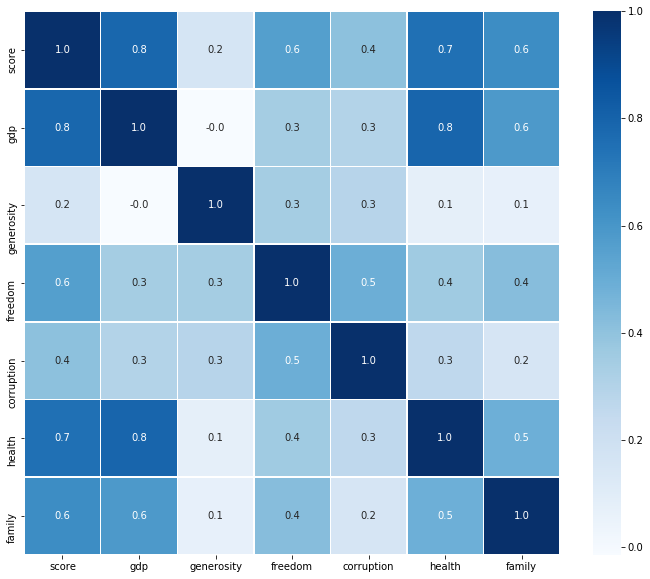

In [30]:
categories = ["score", "gdp", "generosity", "freedom", "corruption", "health", "family"]
fig, ax = plt.subplots(figsize= (12, 10))
sn.heatmap(dim_main_data[categories].corr(), annot=True, cmap="Blues", linewidths=.5, fmt=".1f", ax=ax)
plt.show()



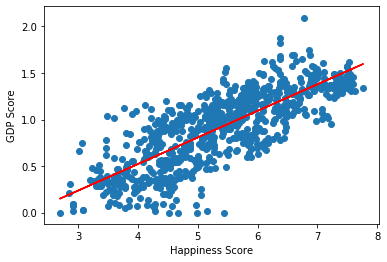

<Figure size 432x288 with 0 Axes>

In [31]:
#since GDP seems to have the greatest correlation with the happiness score, lets look at a linear regresion of the two
linear_regression = LinearRegression()

x = main_data.score.values.reshape(-1, 1)
y = main_data["gdp"].values.reshape(-1,1)



linear_regression.fit(x,y)

plt.scatter(main_data["score"], main_data["gdp"])
y_head = linear_regression.predict(x)
plt.plot(x, y_head, color = "red")
plt.xlabel("Happiness Score")
plt.ylabel("GDP Score")

plt.show()

plt.savefig('Graphs/gdp_score_lineregression.png')


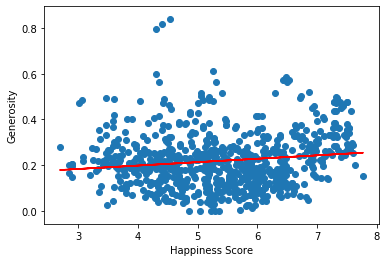

<Figure size 432x288 with 0 Axes>

In [32]:
linear_regression = LinearRegression()

x = main_data.score.values.reshape(-1, 1)
y = main_data["generosity"].values.reshape(-1,1)

linear_regression.fit(x,y)

plt.scatter(main_data["score"], main_data["generosity"])
y_head = linear_regression.predict(x)
plt.plot(x, y_head, color = "red")
plt.xlabel("Happiness Score")
plt.ylabel("Generosity")

plt.show()

plt.savefig('Graphs/final_generosity_score_lineregression.png')

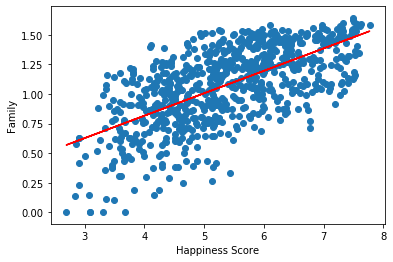

<Figure size 432x288 with 0 Axes>

In [33]:
linear_regression = LinearRegression()

x = main_data.score.values.reshape(-1, 1)
y = main_data["family"].values.reshape(-1,1)

linear_regression.fit(x,y)

plt.scatter(main_data["score"], main_data["family"])
y_head = linear_regression.predict(x)
plt.plot(x, y_head, color = "red")
plt.xlabel("Happiness Score")
plt.ylabel("Family")

plt.show()

plt.savefig('Graphs/family_score_lineregression.png')

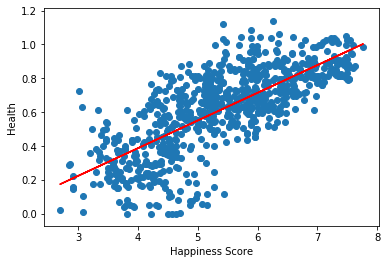

<Figure size 432x288 with 0 Axes>

In [54]:
linear_regression = LinearRegression()

x = main_data.score.values.reshape(-1, 1)
y = main_data["health"].values.reshape(-1,1)

linear_regression.fit(x,y)

plt.scatter(main_data["score"], main_data["health"])
y_head = linear_regression.predict(x)
plt.plot(x, y_head, color = "red")
plt.xlabel("Happiness Score")
plt.ylabel("Health")

plt.show()

plt.savefig('Graphs/health_score_lineregression.png')

In [55]:
#correlation coefficient computation

score = main_data.iloc[:, 2]
gdp = main_data.iloc[:, 3]
correlation = st.pearsonr(score, gdp)
print(f"The correlation between both factors is {round(correlation[0],2)}")

plt.show()

The correlation between both factors is 0.79


In [56]:
fig = sm.qqplot(main_data, line='45')
plt.show()

TypeError: '<' not supported between instances of 'int' and 'str'

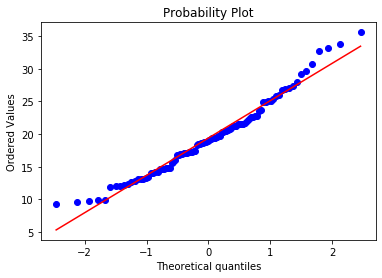

In [43]:
play_data = np.random.normal(loc = 20, scale = 5, size=100)   
st.probplot(play_data, dist="norm", plot=pylab)
pylab.show()